<a href="https://colab.research.google.com/github/bbijjam/Rdatasets/blob/master/MLDay1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


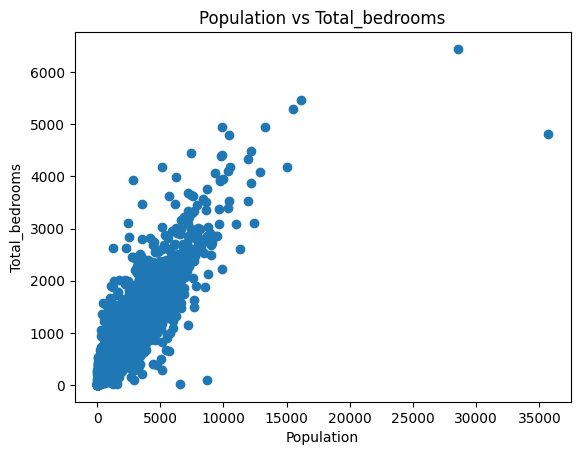

In [2]:
import matplotlib.pyplot as plt

pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total_bedrooms')
plt.title('Population vs Total_bedrooms')
plt.show()

In [3]:

pop_np = pop.to_numpy()
bedrooms_np = bedrooms.to_numpy()
pop_np.shape, bedrooms_np.shape

((17000,), (17000,))

In [4]:
from sklearn.linear_model import LinearRegression as LR
sklearn_model = LR().fit(pop_np.reshape((17000,1)), bedrooms_np)
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000,1)))
sklearn_bedroom_predictions.shape

(17000,)

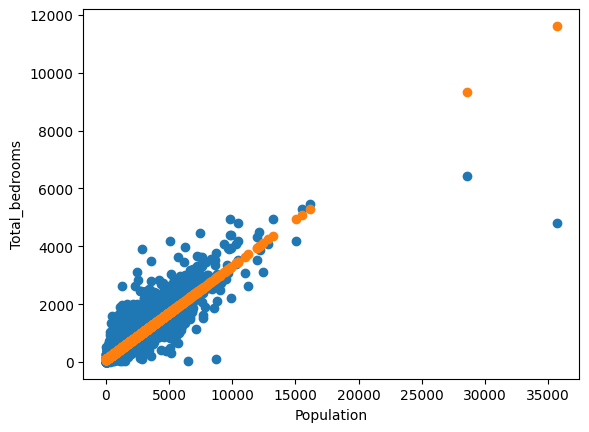

In [5]:

import matplotlib.pyplot as plt

pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total_bedrooms')

plt.scatter(pop, sklearn_bedroom_predictions)


In [6]:
# prompt: check the conditions of overfitting and underfitting

# Calculate the training error (e.g., Mean Squared Error)
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(bedrooms_np, sklearn_bedroom_predictions)


# Check for overfitting:
# - If the training error is very low, but the model performs poorly on unseen data (validation/test set),
#   it indicates overfitting. We don't have a test set here, but we can visually inspect the fit
#   to see if it's capturing noise in the training data.

# Check for underfitting:
# - If the training error is high, and the model also performs poorly on unseen data, it suggests underfitting.
# - It means the model is too simple to capture the underlying patterns in the data.

# In our case, if the line of best fit (from LinearRegression) seems to accurately represent
# the general trend of the scatter plot without fitting too closely to individual data points,
# it is likely a decent fit and not overly overfitting.

# If the line of best fit follows every single data point too closely,
# it might be a sign of overfitting, as it's likely capturing noise and might not generalize well.

# If the line of best fit is too flat or doesn't capture any trend in the data,
# it's a sign of underfitting.

print(f"Training Error (MSE): {train_error}")

# You can also compute R-squared to assess the goodness of fit
from sklearn.metrics import r2_score

r2 = r2_score(bedrooms_np, sklearn_bedroom_predictions)
print(f"R-squared: {r2}")

# A higher R-squared indicates a better fit. However, a very high R-squared
# on the training data might also indicate overfitting, especially if
# the model performs poorly on new data.


Training Error (MSE): 39712.5251421438
R-squared: 0.7764580564644874


In [8]:
# prompt: Training Error (MSE): 39712.5251421438
# R-squared: 0.7764580564644874
# what conclusions can be made about the model based on these results

# Based on the provided results:

# Training Error (MSE): 39712.5251421438
# R-squared: 0.7764580564644874


# Conclusions:

# 1. Relatively Good Fit: The R-squared value of 0.776 indicates that the linear regression model explains approximately 77.6% of the variance in the total bedrooms based on the population. This suggests a relatively good fit to the training data.

# 2. Moderate Training Error: The MSE of 39712.53 is a moderate training error. It implies that on average, the model's predictions for the total bedrooms are off by the square root of this value (around 199.28).

# 3. Potential for Improvement: While the model shows a decent fit, there's room for potential improvement. Further analysis could explore the inclusion of additional features or consider more complex model types to reduce the training error and improve the R-squared value.

# 4. No Clear Overfitting or Underfitting: The combination of a moderate training error and a reasonably good R-squared value suggests that the model is not overly overfitting or underfitting the data. It's capturing the underlying relationship between population and total bedrooms to a reasonable extent.

# 5. Further Validation Needed: However, it's crucial to evaluate the model's performance on unseen data (validation or test set) to confirm that it generalizes well and isn't overfitting the training data. Without this validation, the conclusion about the model's ability to generalize to new data remains uncertain.


# In summary: The model provides a decent representation of the relationship between population and total bedrooms, but further evaluation and potential refinements might lead to an even better model.

